# SVM Lab

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [91]:
# Step 1: Load the dataset (replace with the path to your dataset)
# The dataset should have two columns: 'label' (spam/ham) and 'message' (text)
url = "../data/Fake_News.csv"
data = pd.read_csv(url, sep=',')

In [92]:
data = data.dropna()

In [112]:
## EDA

Do some basic EDA here. How balanced is the data set? Data types? Etc.

We ill ordinal encode the target column

In [94]:
# Encode labels using OrdinalEncoder into 0,1
encoder = OrdinalEncoder()
data['label'] = encoder.fit_transform(data[['label']])

In [95]:
# Print the mapping from labels to numerical values
label_mapping = {category: idx for idx, category in enumerate(encoder.categories_[0])}
print("Label Encoding:")
for label, value in label_mapping.items():
    print(f"'{label}' -> {value}")

Label Encoding:
'Fake' -> 0
'True' -> 1


Define X and y to the be title and label

In [102]:
# define the data


In [ ]:
# Step 2: Split the dataset into training and testing sets
# Make a train/test split

In [114]:
# Step 3: Text encoding using TF-IDF
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Now train the SVM and print an accuract_score and classication_report

In [105]:
# Step 4: Train the SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_tfidf, y_train)

# Step 5: Make predictions and evaluate
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8710155670867309

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       739
         1.0       0.82      0.92      0.87       610

    accuracy                           0.87      1349
   macro avg       0.87      0.88      0.87      1349
weighted avg       0.88      0.87      0.87      1349



### Print Results

In [107]:
# Find misclassified examples
y_pred = np.array(y_pred)
y_test = np.array(y_test)
misclassified_indices = (y_pred != y_test).nonzero()[0]  # Indices where predictions differ from true labels

# Print the first few misclassified examples
print("\nMisclassified Examples:")
for idx in misclassified_indices[10:20]:  # Limit to 5 examples
    print(f"Message: {X_test.iloc[idx]}")
    print(f"True Label: {encoder.inverse_transform([[y_test[idx]]])[0][0]}")
    print(f"Predicted Label: {encoder.inverse_transform([[y_pred[idx]]])[0][0]}")
    print("-" * 50)


Misclassified Examples:
Message: Meet The CA Sheriff Who Won’t Be Bullied By Obama And Illegal Immigrant Activists Who Believe The Laws Don’t Apply To Lawbreakers
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message: ALARMING: NSA Refuses to Release Clinton-Lynch Tarmac Transcript with Lame Excuse
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message: Norway appoints its first female foreign minister
True Label: True
Predicted Label: Fake
--------------------------------------------------
Message:  Anti-Abortion Laws Collapse In Major Defeat For The Right
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message: Shaquille O’Neal: “The Earth is flat. Yes, it is.”
True Label: Fake
Predicted Label: True
--------------------------------------------------
Message: THE LIST OF WHO’S WHO TAKING ADVANTAGE OF FAILED EU AUSTERITY EXPERIMENT IN GREECE
True Label: Fake

### Confusion Matrix

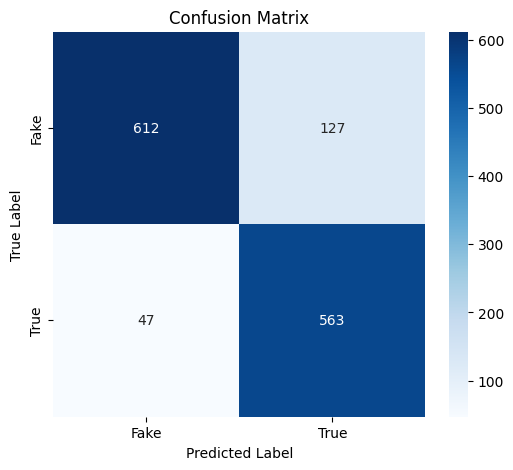

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

# Adding labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()


## TF-IDF

Redo the above analysis with a TF-IDF encoding instead of a Counter (Bag of Words)

# Optimize

There are lots of parameters to SVM/SVC. Try them out and see how good you can do!